In [1]:
DRAW = True

## Dev parameters

In [2]:
import sys
sys.path.insert(1, '../')

# get trainer.
from src.Trainer import Trainer

2023-08-13 16:03:43.863182: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 16:03:43.991753: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 16:03:43.998643: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-13 16:03:45.018907: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# IMPORTS

In [3]:
# data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# confere data.
import sklearn.metrics
import cv2
import natsort

# logger.
import pickle
import mlflow

# DATASETs

In [4]:
# separate datasets.
trainer = Trainer()
[train_set, val_set] = trainer.train_val_split(augment=True)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


# FP MODEL

## Train

In [5]:
trainer.build_fp_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 1)       10        
                                                                 
 average_pooling2d (Average  (None, 64, 64, 1)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 2)         20        
                                                                 
 average_pooling2d_1 (Avera  (None, 32, 32, 2)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 4)         76        
                                                                 
 average_pooling2d_2 (Avera  (None, 16, 16, 4)         0

In [6]:
trainer.training_loop()

2023/08/13 16:03:47 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2023/08/13 16:03:47 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/40
56/56 - 7s - loss: 0.6501 - recall: 0.9757 - binary_accuracy: 0.6110 - precision: 0.6103 - false_negatives: 13.0000 - false_positives: 334.0000 - val_loss: 0.6078 - val_recall: 0.9701 - val_binary_accuracy: 0.6351 - val_precision: 0.6280 - val_false_negatives: 4.0000 - val_false_positives: 77.0000 - 7s/epoch - 122ms/step


/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/40
56/56 - 4s - loss: 0.5680 - recall: 0.8041 - binary_accuracy: 0.7130 - precision: 0.7405 - false_negatives: 105.0000 - false_positives: 151.0000 - val_loss: 0.5624 - val_recall: 0.9030 - val_binary_accuracy: 0.7342 - val_precision: 0.7246 - val_false_negatives: 13.0000 - val_false_positives: 46.0000 - 4s/epoch - 75ms/step
Epoch 3/40
56/56 - 5s - loss: 0.5214 - recall: 0.7985 - binary_accuracy: 0.7253 - precision: 0.7575 - false_negatives: 108.0000 - false_positives: 137.0000 - val_loss: 0.5288 - val_recall: 0.8060 - val_binary_accuracy: 0.7613 - val_precision: 0.8000 - val_false_negatives: 26.0000 - val_false_positives: 27.0000 - 5s/epoch - 88ms/step
Epoch 4/40
56/56 - 4s - loss: 0.5042 - recall: 0.7948 - binary_accuracy: 0.7545 - precision: 0.7963 - false_negatives: 110.0000 - false_positives: 109.0000 - val_loss: 0.5539 - val_recall: 0.6493 - val_binary_accuracy: 0.7027 - val_precision: 0.8208 - val_false_negatives: 47.0000 - val_false_positives: 19.0000 - 4s/epoch - 65ms/

2023/08/13 16:06:35 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/08/13 16:06:35 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmpzteuwrq8/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpzteuwrq8/model/data/model/assets


In [7]:
trainer.load_model_trained()

## Results evaluation

In [8]:
# turn off data augmentation to reproducible results.
[train_set, val_set] = trainer.train_val_split(augment=False)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


56/56 [==============================] - 3s 42ms/step
fp_Train_Metrics
 {'fp_Train_recall': 0.871268656716418, 'fp_Train_acc': 0.8934977578475336, 'fp_Train_precision': 0.947261663286004}
Confusion matrix Train 
 [[330  26]
 [ 69 467]]
56/56 [==============================] - 2s 29ms/step
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (179).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (204).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (205).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (216).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (227).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (237).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (254).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (255).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (289).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (305).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (324).jpe

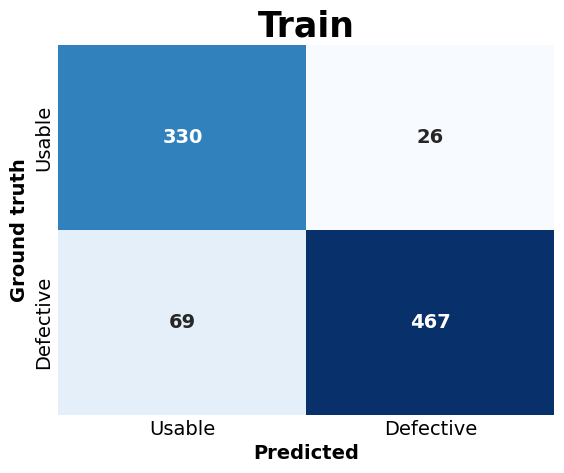

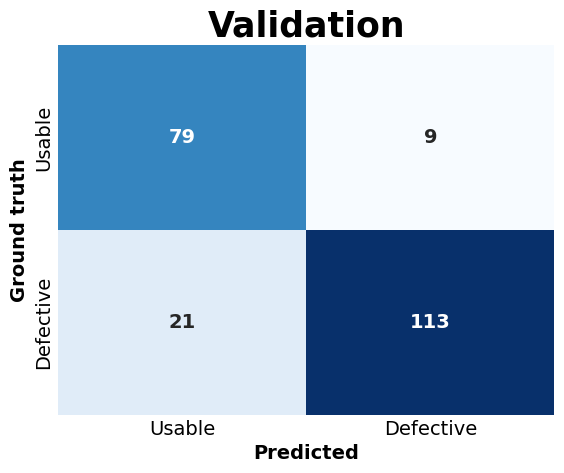

In [9]:
# get confusion matrix and wrong inferences.
trainer.init_metrics_handler()
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "fp")
    trainer.get_errors(set, name, "fp", draw_errors=DRAW)

# QT MODEL

## Build

In [10]:
# build qt model.
trainer.build_qt_model()

INFO:tensorflow:Assets written to: /tmp/tmp7c7m5u1x/assets


INFO:tensorflow:Assets written to: /tmp/tmp7c7m5u1x/assets
/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2023-08-13 16:06:52.986076: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-08-13 16:06:52.986131: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-08-13 16:06:52.986611: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp7c7m5u1x
2023-08-13 16:06:52.989615: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-08-13 16:06:52.989660: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmp7c7m5u1x
2023-08-13 16:06:52.997222: I tensorflow/compi

QT model detais:
input details = {'name': 'serving_default_conv2d_input:0', 'index': 0, 'shape': array([  1, 128, 128,   1], dtype=int32), 'shape_signature': array([ -1, 128, 128,   1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (1.0, -128), 'quantization_parameters': {'scales': array([1.], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
output details = {'name': 'StatefulPartitionedCall:0', 'index': 25, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.00390625, -128), 'quantization_parameters': {'scales': array([0.00390625], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


fully_quantize: 0, inference_type: 6, input_inference_type: INT8, output_inference_type: INT8


b' \x00\x00\x00TFL3\x00\x00\x00\x00\x14\x00 \x00\x1c\x00\x18\x00\x14\x00\x10\x00\x0c\x00\x00\x00\x08\x00\x04\x00\x14\x00\x00\x00\x1c\x00\x00\x00\x88\x00\x00\x00\xe0\x00\x00\x00@\r\x00\x00P\r\x00\x00l"\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\xfe\xf1\xff\xff\x0c\x00\x00\x00\x1c\x00\x00\x008\x00\x00\x00\x0f\x00\x00\x00serving_default\x00\x01\x00\x00\x00\x04\x00\x00\x00\x94\xff\xff\xff\x19\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00dense\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00F\xf3\xff\xff\x04\x00\x00\x00\x0c\x00\x00\x00conv2d_input\x00\x00\x00\x00\x02\x00\x00\x004\x00\x00\x00\x04\x00\x00\x00\xdc\xff\xff\xff\x1c\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00CONVERSION_METADATA\x00\x08\x00\x0c\x00\x08\x00\x04\x00\x08\x00\x00\x00\x1b\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\x1d\x00\x00\x00\\\x0c\x00\x00T\x0c\x00\x00<\x0c\x00\x00 \x0c\x00\x00\x10\x08\x00\x00\xc0\x07\x00\x000\x03\x00\x00\x00\x03\x00\x00\xd0\x01\x00\x00\xb0\x01\x00\x00X\x01\x00\x00@\x0

## Compare QT and FP models

In [11]:
trainer.quantization_error(train_set)

56/56 [==============================] - 2s 29ms/step


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


qt_Metrics
 {'qt_mean': 0.0027146414, 'qt_std': 0.015555711, 'qt_abs_mean': 0.009792841, 'qt_abs_std': 0.012387482}


{'diff': array([ 1.39043927e-02,  1.06685758e-02, -8.86455178e-04, -2.27645636e-02,
         3.04763019e-02, -1.61393301e-03, -3.37846391e-03, -2.28295475e-03,
        -4.47977334e-03,  1.28532499e-02, -2.02767551e-03, -2.23889947e-04,
        -3.03532928e-04,  4.44417447e-03,  9.48034227e-04, -5.66418469e-03,
        -1.68559551e-02,  9.14964080e-03,  2.90437043e-03, -2.06507146e-02,
         3.18055786e-03,  1.29529089e-03,  1.90907940e-02,  3.03301029e-03,
         1.86561458e-02,  2.40165740e-04,  2.66658142e-03,  1.32645965e-02,
         2.85703689e-02,  2.11096406e-02,  3.49497795e-03,  1.57446973e-03,
        -2.67405622e-03, -7.23648071e-03, -2.48327851e-03, -6.04780018e-03,
        -4.51888889e-04,  7.07320869e-03, -1.42272562e-03, -1.31034702e-02,
        -8.64775479e-03,  3.17495316e-04,  2.93140411e-02, -4.05963510e-04,
        -1.11547858e-02, -2.89225206e-03,  2.36073881e-03, -2.30905712e-02,
        -8.08337331e-03,  4.30737436e-03,  7.24166632e-03, -9.55471396e-03,
    

## Evaluate results

qt_Train_Metrics
 {'qt_Train_recall': 0.8731343283582089, 'qt_Train_acc': 0.8867713004484304, 'qt_Train_precision': 0.9341317365269461}
Confusion matrix Train 
 [[323  33]
 [ 68 468]]
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (179).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (182).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (204).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (205).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (216).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (227).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (237).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (254).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (255).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (264).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (282).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (289).jpeg', '../dataset/resize_128/train/0_utilizav

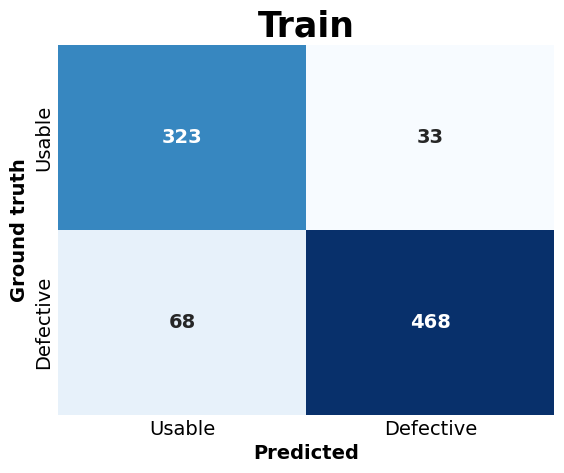

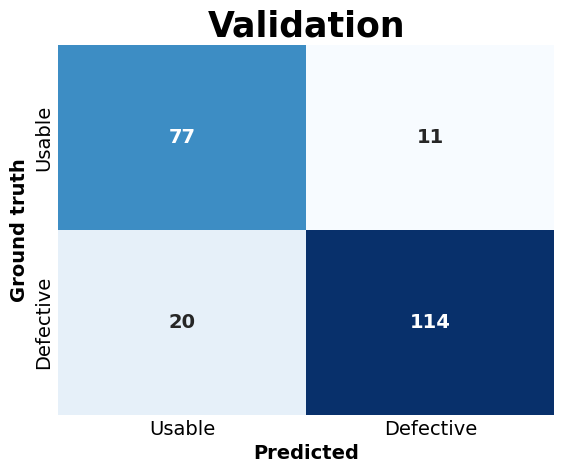

In [12]:
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "qt")
    trainer.get_errors(set, name, "qt", draw_errors=DRAW)

# TEST DATASET

In [13]:
# test results.
test_set = trainer.test_set_gen()

Found 183 images belonging to 2 classes.
Test set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


## FP model

12/12 [==============================] - 0s 28ms/step
fp_Test_Metrics
 {'fp_Test_recall': 0.8636363636363636, 'fp_Test_acc': 0.8852459016393442, 'fp_Test_precision': 0.9405940594059405}
Confusion matrix Test 
 [[67  6]
 [15 95]]
12/12 [==============================] - 0s 28ms/step
Errors list Test 
 ['../dataset/resize_128/test/0_utilizavel/utiliza (460).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (461).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (480).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (493).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (517).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (518).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (671).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (672).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (677).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (680).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (687).jpeg', '../dataset/res

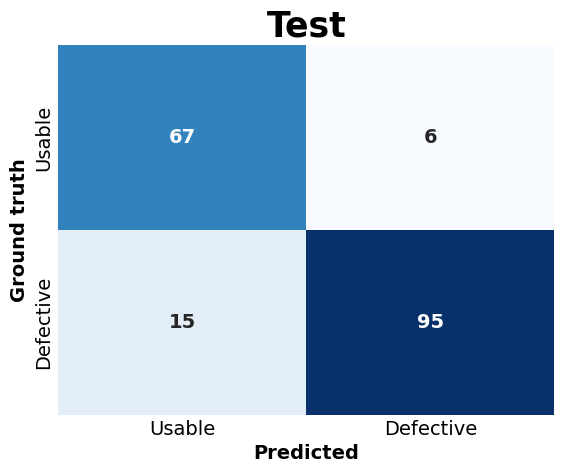

In [14]:
trainer.get_confusion_matrix(test_set, "Test", "fp")
trainer.get_errors(test_set, "Test", "fp", draw_errors=True)

## QT model

qt_Test_Metrics
 {'qt_Test_recall': 0.8636363636363636, 'qt_Test_acc': 0.8852459016393442, 'qt_Test_precision': 0.9405940594059405}
Confusion matrix Test 
 [[67  6]
 [15 95]]
Errors list Test 
 ['../dataset/resize_128/test/0_utilizavel/utiliza (460).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (461).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (480).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (493).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (517).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (518).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (671).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (672).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (677).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (680).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (687).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (690).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (704).jpeg',

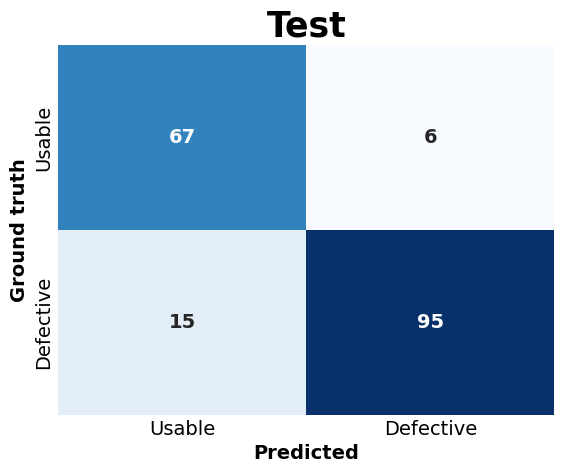

In [15]:
trainer.get_confusion_matrix(test_set, "Test", "qt")
trainer.get_errors(test_set, "Test", "qt", draw_errors=True)

# END LOGGER RUN

In [16]:
trainer.end_run()